In [2]:
import pandas as pd
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [9]:
 df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [11]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [12]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [13]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [14]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x=df.drop(columns=['Exited'])
y=df['Exited']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [17]:
x_train.shape

(8000, 11)

In [18]:
y_test.shape

(2000,)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()

In [21]:
x_trained_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [22]:
x_trained_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [23]:
x_test_scaled


array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.58312392,
        -0.57273139,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.58312392,
        -0.57273139,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ..., -0.58312392,
         1.74601919,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ...,  1.71490137,
        -0.57273139, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [24]:
model=Sequential()

In [25]:
model.add(Dense(256,activation='relu',input_dim=11))
model.add(Dense(64,activation='relu'))
model.add(Dense(16,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 20,577
Trainable params: 20,577
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [28]:
history = model.fit(x_trained_scaled,y_train,epochs=50,validation_split=0.5)

Epoch 1/50
125/125 [==============================] - 6s 13ms/step - loss: 0.4471 - accuracy: 0.8073 - val_loss: 0.4189 - val_accuracy: 0.8245
Epoch 2/50
125/125 [==============================] - 1s 7ms/step - loss: 0.3937 - accuracy: 0.8418 - val_loss: 0.3842 - val_accuracy: 0.8425
Epoch 3/50
125/125 [==============================] - 1s 5ms/step - loss: 0.3631 - accuracy: 0.8550 - val_loss: 0.3615 - val_accuracy: 0.8508
Epoch 4/50
125/125 [==============================] - 0s 4ms/step - loss: 0.3483 - accuracy: 0.8643 - val_loss: 0.3550 - val_accuracy: 0.8518
Epoch 5/50
125/125 [==============================] - 0s 4ms/step - loss: 0.3398 - accuracy: 0.8608 - val_loss: 0.3532 - val_accuracy: 0.8487
Epoch 6/50
125/125 [==============================] - 0s 3ms/step - loss: 0.3347 - accuracy: 0.8660 - val_loss: 0.3540 - val_accuracy: 0.8497
Epoch 7/50
125/125 [==============================] - 1s 5ms/step - loss: 0.3301 - accuracy: 0.8700 - val_loss: 0.3540 - val_accuracy: 0.8505
Epoch

In [29]:
history.history

{'loss': [0.4470643699169159,
  0.3936591148376465,
  0.3631210923194885,
  0.3482724130153656,
  0.33981478214263916,
  0.3347139358520508,
  0.3301379084587097,
  0.3261200487613678,
  0.321540504693985,
  0.31864869594573975,
  0.3169400691986084,
  0.31428346037864685,
  0.3082781732082367,
  0.30357250571250916,
  0.2999551296234131,
  0.2958984076976776,
  0.2919778823852539,
  0.28899940848350525,
  0.28621888160705566,
  0.2815503478050232,
  0.2797110676765442,
  0.2712579667568207,
  0.26782873272895813,
  0.26187169551849365,
  0.2590773105621338,
  0.256034255027771,
  0.2549188733100891,
  0.24990826845169067,
  0.24302922189235687,
  0.2395508736371994,
  0.2339789718389511,
  0.23251809179782867,
  0.23247168958187103,
  0.2192927449941635,
  0.2181001603603363,
  0.2089242786169052,
  0.20782257616519928,
  0.2058054506778717,
  0.21072664856910706,
  0.1953534632921219,
  0.1921853870153427,
  0.18849827349185944,
  0.18300381302833557,
  0.17874911427497864,
  0.17643

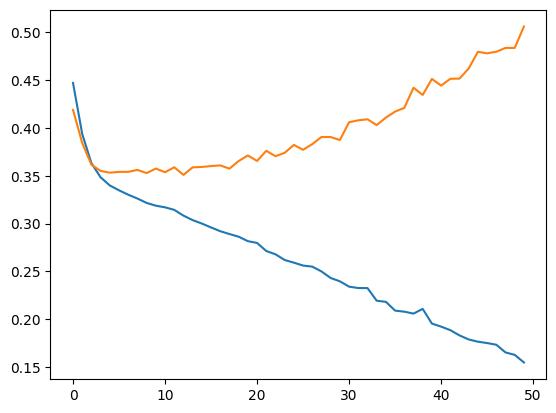

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

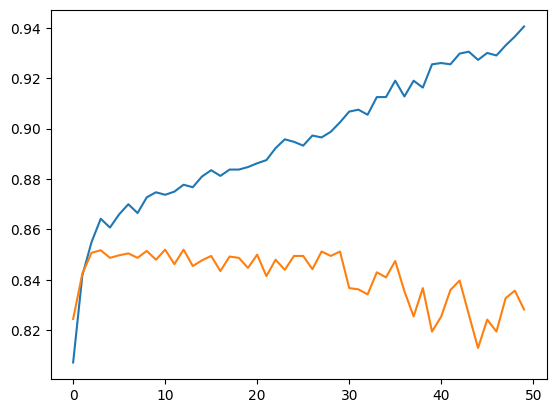

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [32]:
model.layers[0].get_weights()

[array([[-0.03167479,  0.18565948, -0.19616884, ...,  0.07489149,
          0.22538328, -0.37253895],
        [ 0.23077904, -0.0151343 , -0.45574164, ...,  0.01709797,
          0.02791855, -0.2386046 ],
        [ 0.11537421, -0.10698042, -0.11367731, ...,  0.19744264,
         -0.03453122, -0.11175093],
        ...,
        [ 0.11036997,  0.17727424, -0.02276976, ...,  0.08272811,
         -0.11033567, -0.08800218],
        [-0.00966535, -0.00458907,  0.14541985, ..., -0.20380121,
         -0.03743878, -0.11697455],
        [-0.12217239,  0.2829479 ,  0.21847339, ...,  0.05691644,
          0.01015562,  0.12269202]], dtype=float32),
 array([ 5.38245887e-02,  7.32070357e-02, -1.43789142e-01,  1.98710989e-02,
        -1.81710459e-02, -5.20392023e-02,  1.09123863e-01,  7.55311409e-03,
        -4.15900946e-02, -1.61098316e-01,  6.37447163e-02, -1.93236977e-01,
         7.89612457e-02, -1.34082258e-01, -1.90269858e-01, -3.84726971e-02,
        -1.20959572e-01, -1.64784536e-01, -5.38588092e

In [33]:
model.layers[1].get_weights()

[array([[-0.33561626,  0.16429654, -0.10125525, ...,  0.07970006,
         -0.13401756, -0.11200389],
        [-0.00696614, -0.02069199,  0.15442297, ..., -0.12724897,
         -0.00762236, -0.06624968],
        [-0.18815885, -0.00056891, -0.25503138, ...,  0.10124499,
         -0.18376994,  0.09756969],
        ...,
        [ 0.03116594, -0.06874917, -0.03110367, ...,  0.06195603,
          0.10201766,  0.06378782],
        [ 0.05443096, -0.22529055,  0.06931704, ..., -0.03978068,
          0.10872205, -0.10295098],
        [-0.08506489, -0.05915277, -0.06520075, ...,  0.11727994,
          0.10572222, -0.30006006]], dtype=float32),
 array([ 0.06323288,  0.00979097,  0.11493541,  0.07824147,  0.00706757,
         0.0017372 , -0.02669742,  0.05902923,  0.06866131,  0.06083048,
         0.01876611,  0.08266936,  0.00702718,  0.0569286 ,  0.03026998,
         0.00709194,  0.02696514, -0.02371146,  0.01420878, -0.02858573,
         0.11210169,  0.03160344,  0.02781195, -0.0724199 , -0.012

In [34]:
y_log = model.predict(x_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [35]:
y_pred=np.where(y_log>0.5,1,0)

In [36]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test,y_pred)

0.8295